## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1.  Classification and regression both involve making predictions, but in classification the prediction is categorical. The prediction in regression is numeric.  

2. A confusion table is a visualization of the classifications a model makes and its correct and incorrect classifications. It gives us insight into the model's accuracy and even when inaccurate, we have insights into what kinds of mistakes the model is making.

3. Accuracy is the proportion of correct predictions made by the model. This may not be sufficient because accuracy alone does not provide information about the situations that lead to an incorrect prediction. For example, a model may be 93% accurate, which is solid; however, diving deeper, there may be a category that is being frequently miscategorized by the model.

4. The root mean squared error is the distance from the true values to the predicted ones, weighed by sample size.

5. Overfitting occurs when the k is too low, making the model too sensitive to a small number of data points. Underfitting is the opposite; when the k is too high, the model has too many points to consider, which will cause the prediction to be closer to the population norm instead of a more specific prediction.

6. Splitting the data allows the model to make predictions for data it has never seen before based on the data it was trained with. This is ideal because the model will need to be able to do this accurately with completely new cases. Selecting the optimal k helps the model make more accurate predictions overall.

7. Reporting a class label as a prediction is hard classification. An advantage of hard classification is that it's more straightforward and more applicable in situations where decision-making/sorting is required or where the consequences of making an incorrect prediction are not serious. Soft classification, where proportions are reported instead of a hard label, are more advantageous when the context requires a more nuanced prediction. This approach is less straightforward and may overcomplicate things if used in an otherwise simple context.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [2]:
! git clone https://github.com/AngelikaBaloy/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 67 (delta 17), reused 7 (delta 7), pack-reused 42 (from 2)
Receiving objects: 100% (67/67), 775.74 KiB | 6.93 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Download complete
Extracting data files...
Data extracted


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
mines_df = pd.read_csv('/content/data/land_mines.csv') # load data
mines_df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


          voltage      height        soil
count  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550
std      0.195819    0.306043    0.344244
min      0.197734    0.000000    0.000000
25%      0.309737    0.272727    0.200000
50%      0.359516    0.545455    0.600000
75%      0.482628    0.727273    0.800000
max      0.999999    1.000000    1.000000


<Axes: >

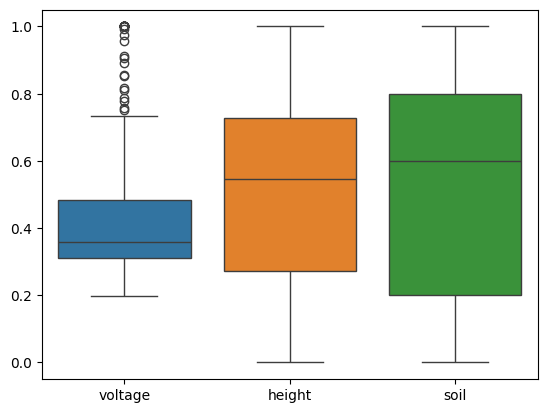

In [ ]:
# 1 eda

vars = ['voltage', 'height', 'soil']
x = mines_df.loc[:, vars]

print(x.describe())

sns.boxplot(x)


<Axes: xlabel='mine_type', ylabel='voltage'>

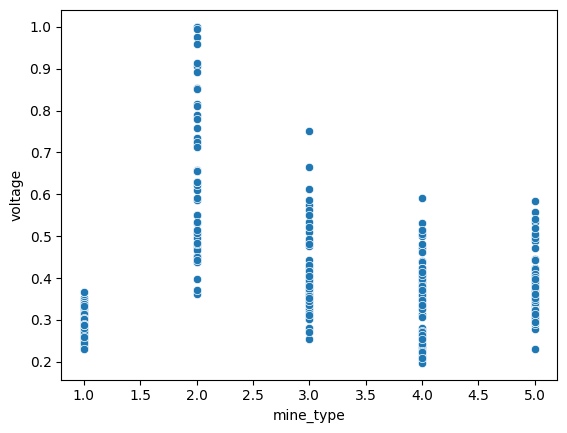

In [ ]:
sns.scatterplot(x=mines_df['mine_type'], y=mines_df['voltage'])

<Axes: xlabel='height', ylabel='voltage'>

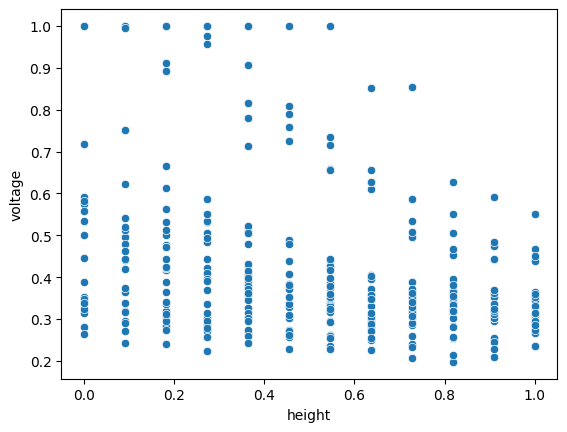

In [ ]:
sns.scatterplot(x=mines_df['height'], y=mines_df['voltage'])

<Axes: xlabel='soil', ylabel='voltage'>

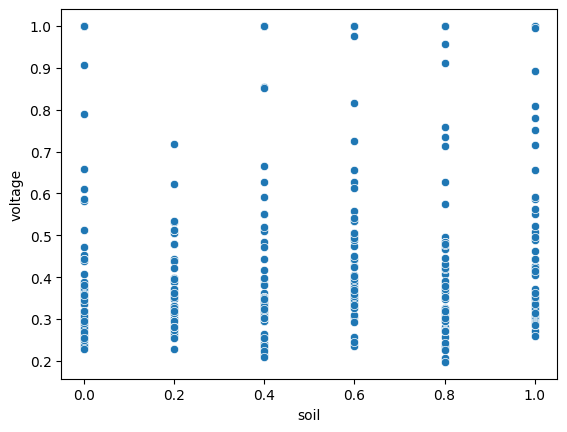

In [ ]:
sns.scatterplot(x=mines_df['soil'], y=mines_df['voltage'])

In [ ]:
# split 50/50

vars = ['voltage', 'height', 'soil']
y = mines_df['mine_type']

x = mines_df.loc[:, vars]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=100)




(array([0]),)

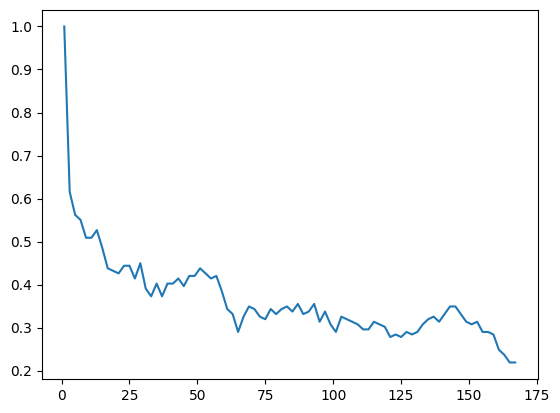

In [ ]:
# build kNN classifier

# finding the optimal k
k_grid = [(2*k+1) for k in range(84)] # x-train is 169 items
acc = []

for k in k_grid:
  model = KNeighborsClassifier(n_neighbors= k)
  model = model.fit(x_train, y_train)
  y_hat = model.predict(x_train)
  acc.append(model.score(x_train, y_train))

sns.lineplot(x=k_grid, y=acc) # training accuracy

np.max(acc) # max accuracy is 1.0
np.where(acc == np.max(acc)) # most accurate where k=1

(array([6]),)

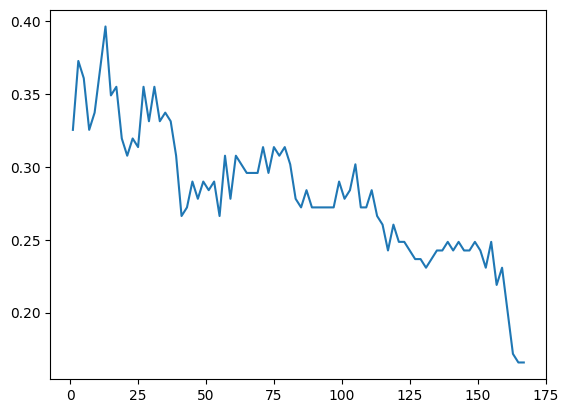

In [ ]:
# test accuracies

k_grid = [(2*k+1) for k in range(84)] # x-train is 169 items
acc_test = []

for k in k_grid:
  model = KNeighborsClassifier(n_neighbors= k)
  model = model.fit(x_train, y_train)
  y_hat = model.predict(x_test)
  acc_test.append(model.score(x_test, y_test))

sns.lineplot(x=k_grid, y=acc_test) # test accuracy

np.max(acc_test) # max accuracy is 0.39
np.where(acc_test == np.max(acc_test)) # most accurate where k=13 (2*6+1)

In [ ]:
# KNN where k=13

# Final model

model = KNeighborsClassifier(n_neighbors= 13)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)
mines_accuracy = model.score(x_test, y_test)


In [ ]:
# 4 confusion table & accuracy

print(mines_accuracy)
# This model is 39.6% accurate
pd.crosstab(y_test, y_hat) # confusion matrix

# of the 5 mine types, the first two are the most correctly predicted.
# Types 3, 4, and 5 are more miscategorized than correctly categorized.

0.39644970414201186


col_0,1,2,3,4,5
mine_type,,,,,
1,26,0,10,0,2
2,0,21,7,2,5
3,3,3,8,0,19
4,17,0,7,4,7
5,7,0,13,0,8


In [ ]:
# 5

# The model's predictions are all over the place, so I'd advise caution.
# There is a decent chance that type 5 (predicted) is actually type 3, type 1 (predicted) may
# be correctly identified as 1 or miscategorized as 4 and so on and so forth.
# The model, though it is better at predicting the types 1 & 2, still only has 39% accuracy overall,
# which is important to keep in mind.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [4]:
# 1 ) load in cars
cars_df = pd.read_csv('/content/data/USA_cars_datasets.csv')
cars_df = cars_df.loc[:,('price', 'year', 'mileage')]
cars_df.head()

np.sum(cars_df.isna(), axis=0) # nothing is missing

,0
price,0
year,0
mileage,0


In [5]:
# 2 ) maxmin year & mileage
cars_df.describe() # year 1973-2020 / mileage 0-a lot

def maxmin(x):
  u = (x-min(x))/(max(x)-min(x))
  return u

cars_df['year'] = maxmin(cars_df['year'])
cars_df['mileage'] = maxmin(cars_df['mileage'])
cars_df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [6]:
# 3 ) .8/.2 train-test

vars = ['year', 'mileage']
y = cars_df['price']

x = cars_df.loc[:, vars]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=100)

126446573.21822222
0.09585031893913087


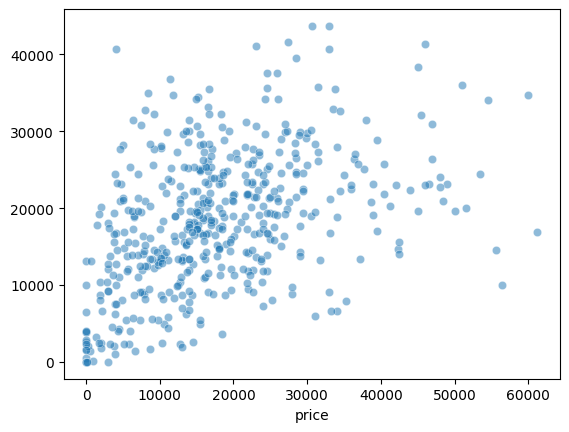

In [7]:
# 4 ) kNN k=3

model = KNeighborsRegressor(n_neighbors= 3)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)
cars3 = model.score(x_test, y_test)

sns.scatterplot(x=y_test, y=y_hat, alpha=.5)

# mse
def mse(y_test,y_hat):
    mse = np.sum( (y_test - y_hat) ** 2 )/len(y_test)
    return mse

print(mse(y_test, y_hat))


print(cars3)

110802185.58681999
0.20771470345601006


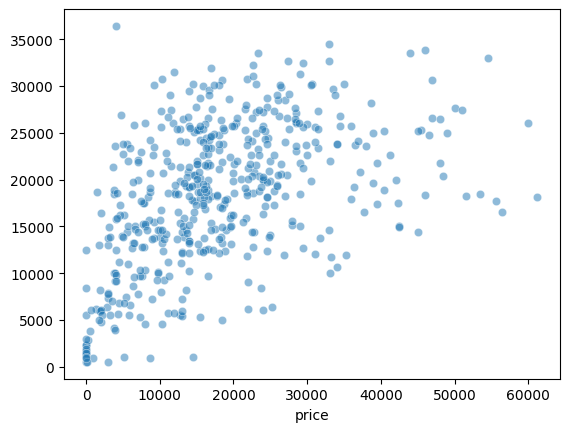

In [181]:
# 4 ) kNN k=10
model = KNeighborsRegressor(n_neighbors= 10)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)
cars10 = model.score(x_test, y_test)

sns.scatterplot(x=y_test, y=y_hat, alpha=.5)

# mse
print(mse(y_test, y_hat))


print(cars10)

103170457.848608
0.2622849778796539


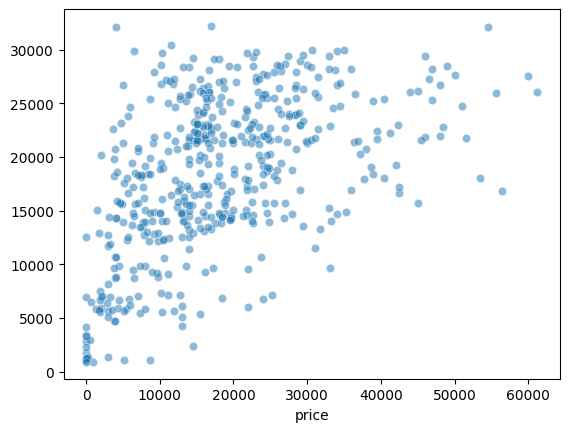

In [180]:
# 4 ) kNN k=25
model = KNeighborsRegressor(n_neighbors= 25)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)
cars25= model.score(x_test, y_test)

sns.scatterplot(x=y_test, y=y_hat, alpha=.5)

# mse
print(mse(y_test, y_hat))


print(cars25)

99695443.96419598
0.2871328849071607


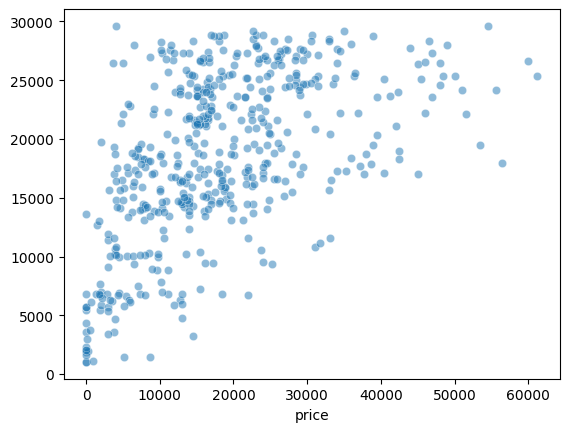

In [179]:
# 4 ) kNN k=50

model = KNeighborsRegressor(n_neighbors= 50)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)
cars50 = model.score(x_test, y_test)

sns.scatterplot(x=y_test, y=y_hat, alpha=.5)

# mse
print(mse(y_test, y_hat))

# accuracy
print(cars50)

98271058.96092059
0.2973178761935338


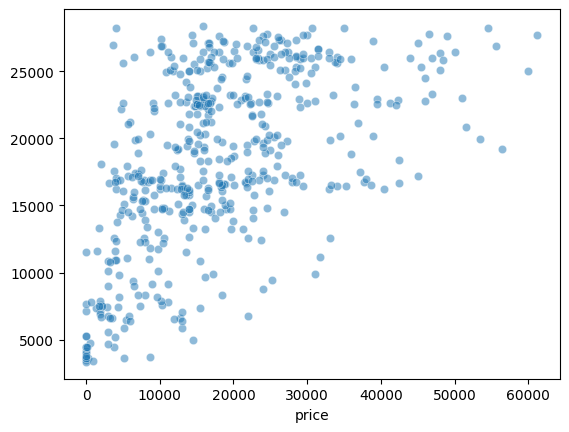

In [178]:
# 4 ) kNN k=100
model = KNeighborsRegressor(n_neighbors= 100)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)
cars100 = model.score(x_test, y_test)

sns.scatterplot(x=y_test, y=y_hat, alpha=.5)

# mse
print(mse(y_test, y_hat))


print(cars100)

100477298.914212
0.2815422715302932


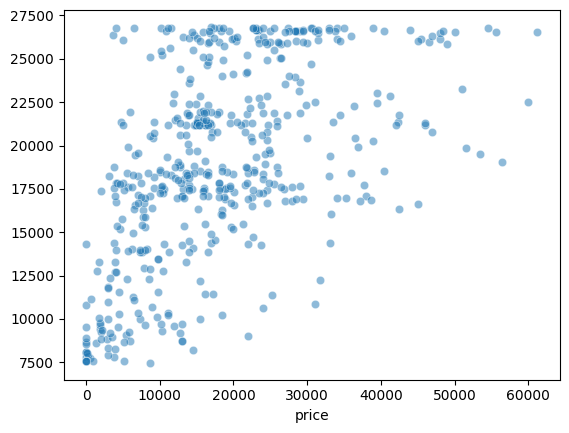

In [177]:
# 4 ) kNN k=300
model = KNeighborsRegressor(n_neighbors= 300)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)
cars300 = model.score(x_test, y_test)

sns.scatterplot(x=y_test, y=y_hat, alpha=.5)

# mse
print(mse(y_test, y_hat))


print(cars300)


In [ ]:
# 4 )
# As k increases from k=3 to k=100, the MSE decreases and model.score (R^2) increases.
# However, when k=300, the MSE increases and the model.score (R^2) decreases.
# This shows that the optimal k is not at either ends (high/low) but in-between.

In [8]:
len(x_train)

1999

97988032.50151458


(array([38]),)

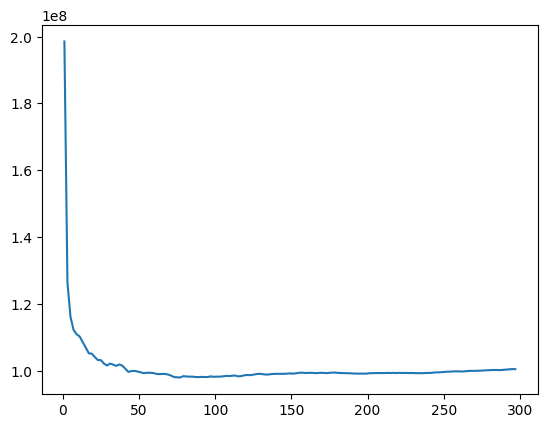

In [14]:
# 5 ) optimal k

k_grid = [(2*k+1) for k in range(149)] # x-train is 1999 items but I'll keep it to 300
mses = []

for k in k_grid:
  model = KNeighborsRegressor(n_neighbors= k)
  model = model.fit(x_train, y_train)
  y_hat = model.predict(x_test)
  mses.append(mse(y_test, y_hat))

sns.lineplot(x=k_grid, y=mses) # ks vs mses

print(np.min(mses)) # min mse is 97988032.5
np.where(mses == np.min(mses)) # most optimal where k= 77

In [ ]:
# 6 ) k plots

# When k was too low, or when the model was overfitted, the predictions were all over the place
# and had a lot of variation because the model was only using a few points as reference.
# On the other hand, when k was too high, it was clear that most predictions were approaching the population mean
# because too many points were considered.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [27]:
# 1 ) load in
animals = pd.read_csv('/content/data/zoo.csv')
animals.head()


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [34]:
animals.shape

(101, 18)

In [26]:
animals['class'].value_counts() # number of animals per class; class 1 is the largest

,count
class,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [25]:
animals.groupby('class').value_counts()

class  animal    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize
1      aardvark  1     0         0     1     0         0        1         1        1         1         0         0     4     0     0         1          1
       antelope  1     0         0     1     0         0        0         1        1         1         0         0     4     1     0         1          1
       bear      1     0         0     1     0         0        1         1        1         1         0         0     4     0     0         1          1
       boar      1     0         0     1     0         0        1         1        1         1         0         0     4     1     0         1          1
       buffalo   1     0         0     1     0         0        0         1        1         1         0         0     4     1     0         1          1
                                                                                                                                                       ..
7      scorpion  0     0         0     0     0         0        1         0        0         1         1         0     8     1     0         0          1
       seawasp   0     0         1     0     0         1        1         0        0         0         1         0     0     0     0         0          1
       slug      0     0         1     0     0         0        0         0        0         1         0         0     0     0     0         0          1
       starfish  0     0         1     0     0         1        1         0        0         0         0         0     5     0     0         0          1
       worm      0     0         1     0     0         0        0         0        0         1         0         0     0     0     0         0          1
Name: count, Length: 101, dtype: int64

In [23]:
class_animal = animals.loc[:, ('class', 'animal')]
class_animal.loc[class_animal['class'] == 1] # 4 legs, hair, milk...these are mammals?

,class,animal
0,1,aardvark
1,1,antelope
3,1,bear
4,1,boar
5,1,buffalo
6,1,calf
9,1,cavy
10,1,cheetah
17,1,deer
19,1,dolphin


In [53]:
# 2 ) 50/50 split
y = animals['class']

x = animals.iloc[:,1:17] # everything except class and animal

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=100)

0.9607843137254902


(array([0]),)

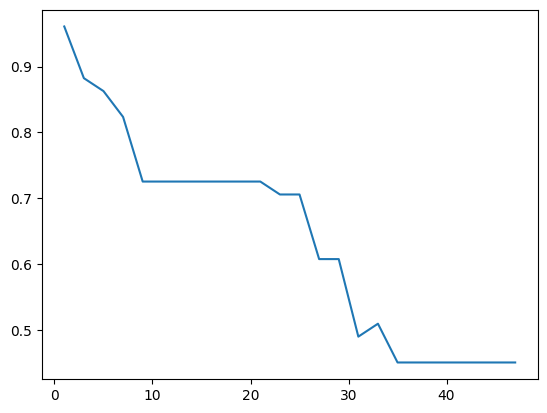

In [54]:
# 3 ) kNN classifier

# finding k
k_grid = [(2*k+1) for k in range(24)] # x-train is 50 items
acc_test = []

for k in k_grid:
  model = KNeighborsClassifier(n_neighbors= k)
  model = model.fit(x_train, y_train)
  y_hat = model.predict(x_test)
  acc_test.append(model.score(x_test, y_test))

sns.lineplot(x=k_grid, y=acc_test) # test accuracy

print(np.max(acc_test)) # max accuracy is 96.1%
np.where(acc_test == np.max(acc_test)) # most accurate where k=1

In [55]:
# kNN where k=1
model = KNeighborsClassifier(n_neighbors= 1)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)

print(model.score(x_test, y_test))

pd.crosstab(y_test, y_hat) # pretty good; only 2 mistakes when predicting for class 3
# Class 3 is a small group, so I suppose it would be harder to make accurate predictions when the
# model has less information to base itself off of

0.9607843137254902


col_0,1,2,3,4,5,6,7
class,,,,,,,
1,23,0,0,0,0,0,0
2,0,12,0,0,0,0,0
3,0,0,1,1,1,0,0
4,0,0,0,3,0,0,0
5,0,0,0,0,3,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,0,2


In [56]:
# 5 ) new kNN; milk / aquatic / airborne

# set up
vars = ['milk', 'aquatic', 'airborne']
y = animals['class']

x = animals.loc[:, vars]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=100) # 50/50 split again


0.7450980392156863


(array([2]),)

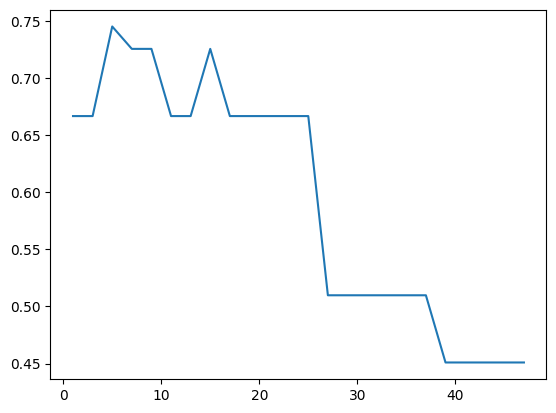

In [57]:
# k
k_grid = [(2*k+1) for k in range(24)] # x-train is 50 items
acc_test = []

for k in k_grid:
  model = KNeighborsClassifier(n_neighbors= k)
  model = model.fit(x_train, y_train)
  y_hat = model.predict(x_test)
  acc_test.append(model.score(x_test, y_test))

sns.lineplot(x=k_grid, y=acc_test) # test accuracy

print(np.max(acc_test)) # max accuracy is 74.5%
np.where(acc_test == np.max(acc_test)) # most accurate where k=5

In [61]:
# new kNN where k=3
model = KNeighborsClassifier(n_neighbors= 5)
model = model.fit(x_train, y_train)
y_hat = model.predict(x_test)

print(model.score(x_test, y_test)) # accuracy
pd.crosstab(y_test, y_hat) # confusion table; only predicts classes 1, 2 and 4

0.7450980392156863


col_0,1,2,4
class,,,
1,23,0,0
2,0,12,0
3,0,2,1
4,0,0,3
5,0,0,3
6,0,5,0
7,0,0,2


In [62]:
# soft classification
model.predict_proba(x_test.values)

# for a given case, the probability is not split between all seven classes; there are a couple classes out of the 7
# as best guesses and the probability is split between those guesses. Only classes 1, 2, and 4 had large enough probabilities
# for hard classification. The rest were too low and therefore were not represented in the hard classfication at all.
# for some cases, the model has assigns 100% probability for a single class (which is always class 1), expressing certainty

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.6, 0. , 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [0.6, 0.2, 0. , 0. , 0. , 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0. , 0. , 0.4, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0. , 0. , 0. , 0.4],
       [0. , 0.4, 0.2, 0. , 0. , 0. , 0.4],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0. , 0. , 0. , 0.4],
       [0. , 0.6, 0. , 0. , 0. , 0.4, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0. , 0. ,

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)